In [1]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

In [2]:
def data_returns(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"].pct_change()).dropna())
       
    return returns

def data_(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"]).dropna())
       
    return returns

tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA","^IXIC", "^TNX"]
tech=data_returns(tickers,"2023-01-01","2023-04-01")
tech_data=data_(tickers,"2023-01-01","2023-04-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

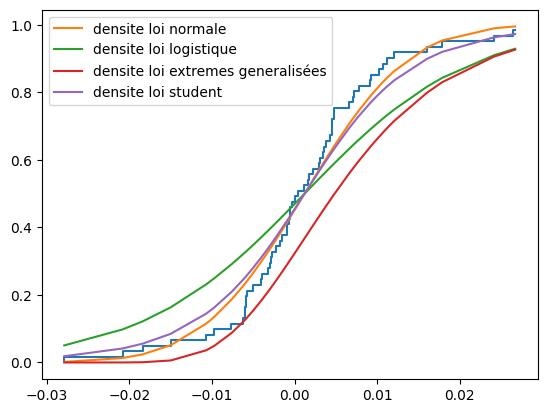

In [3]:
title=tech["GC=F"]
n=len(title)
#X=stats.norm.rvs(loc=0,scale=1, size=n)
fig,ax=plt.subplots()
#on le classe:
X_sort=np.sort(title)
ax.plot(X_sort,np.arange(n)/n,drawstyle='steps-pre')
ax.plot(X_sort,stats.norm.cdf(X_sort,loc=title.mean(),scale=title.std()), label='densite loi normale')
ax.plot(X_sort,stats.logistic.cdf(X_sort,loc=title.mean(),scale=title.std()), label='densite loi logistique')
ax.plot(X_sort,stats.genextreme.cdf(X_sort,0,loc=title.mean(),scale=title.std()), label='densite loi extremes generalisées')
ax.plot(X_sort,stats.t.cdf(X_sort,4.5,loc=title.mean(),scale=title.std()), label='densite loi student')
ax.legend()
plt.show()


In [4]:
def Pond(n):
    """Donne la pondération pour un portefeuille composé de n actifs"""
    W=np.random.randint(1,10,n)  # Generation de n entiers compris entre 1 et 10
    W= W/np.sum(W) #  Normalisation pour aoir la somme de spondérations égale à 1
    return W

sum(Pond(3))

1.0

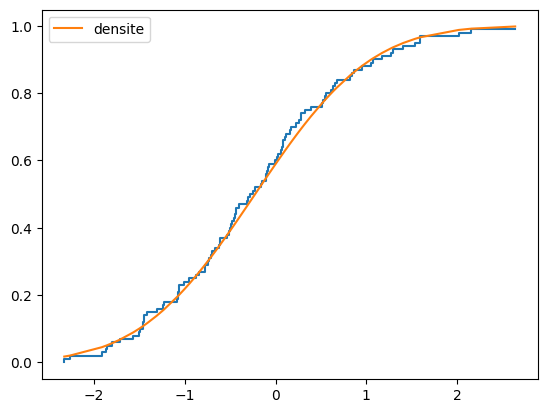

In [5]:
n=100
#un échantillon
X=stats.norm.rvs(loc=0,scale=1, size=n)
fig,ax=plt.subplots()
#on le classe:
X_sort=np.sort(X)
ax.plot(X_sort,np.arange(n)/n,drawstyle='steps-pre')
ax.plot(X_sort,stats.norm.cdf(X_sort,loc=X.mean(),scale=X.std()), label='densite')
ax.legend()
plt.show()

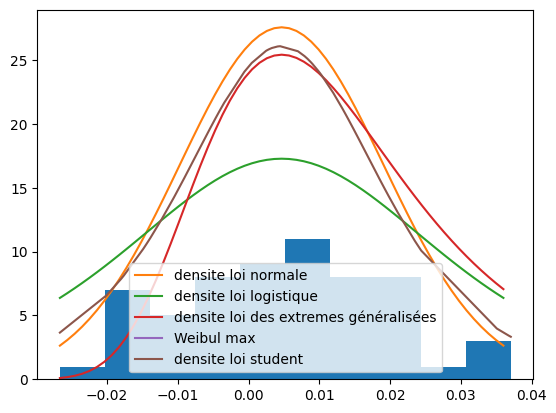

In [6]:
title=tech["AAPL"]
n=len(title)
#X=stats.norm.rvs(loc=0,scale=1, size=n)
fig,ax=plt.subplots()
#on le classe:
X_sort=np.sort(title)
ax.hist(X_sort)
maxx=max(title)
minn=min(title)
x=np.arange(min(title),max(title),(maxx-minn)/n)
ax.plot(x,stats.norm.pdf(x,loc=title.mean(),scale=title.std()), label='densite loi normale')
ax.plot(x,stats.logistic.pdf(x,loc=title.mean(),scale=title.std()), label='densite loi logistique')
ax.plot(x,stats.genextreme.pdf(x,0,loc=title.mean(),scale=title.std()), label='densite loi des extremes généralisées')
ax.plot(x,stats.weibull_max.pdf(x,0,loc=title.mean(),scale=title.std()), label='Weibul max')
ax.plot(X_sort,stats.t.pdf(X_sort,4.5,loc=title.mean(),scale=title.std()), label='densite loi student')
ax.legend()
plt.show()

In [7]:
title=tech["GC=F"]
normal=stats.norm.rvs(size=len(title), loc=np.mean(title), scale=np.std(title))
normal2= np.random.normal(loc=np.mean(title), scale=np.std(title),size=len(title))
result_normal= stats.kstest(title, normal)
logistiq=stats.logistic.rvs(size=len(title), loc=np.mean(title), scale=np.std(title))
result_logistic= stats.kstest(title, logistiq)
student=stats.t.rvs(4.92,size=len(title), loc=np.mean(title), scale=np.std(title))
student_result=stats.kstest(title, student)
print(result_normal)
print(result_logistic)
print(student_result)

KstestResult(statistic=0.13114754098360656, pvalue=0.674845026660773)
KstestResult(statistic=0.21311475409836064, pvalue=0.12545796120645908)
KstestResult(statistic=0.14754098360655737, pvalue=0.5237934776681328)


In [8]:
title=tech["GC=F"]
result_normal= stats.kstest(title, stats.norm.cdf)
result_logistic= stats.kstest(title, stats.logistic.cdf)
result_normal= stats.kstest(title, "norm")
#student_result= stats.kstest(title, stats.t.cdf, args=(238107,))
student_result =stats.kstest(title, "t", args=((2.995634893331969, 0.0007902892367437147, 0.006486576791623243)))
print(result_normal)
print(result_logistic)
print(student_result)

KstestResult(statistic=0.4893528153717168, pvalue=5.434550806759541e-14)
KstestResult(statistic=0.49332747037232405, pvalue=3.1626148527658255e-14)
KstestResult(statistic=0.06438253692574626, pvalue=0.9479603071598408)


In [9]:
def ks_test(modele,title):
    kstest=pd.DataFrame()
    for i in range(modele.shape[0]):
       result=stats.kstest(title, modele[i][-1], args=modele[i][-4])
       kstest[modele[i][-1]]=result


In [10]:
def testKolmogorov(title):
    tests={}   # creation d'un dico dont les clés seront le nom des lois et les valeurs, les résultats du test
    n=len(title)
    mu=np.mean(title)
    sigma=np.std(title)
    tests["normal"]=stats.kstest(title,stats.norm.rvs(size=n, loc=mu, scale=sigma))[1]
    tests["logistique"]=stats.kstest(title, stats.logistic.rvs(size=n, loc=mu, scale=sigma))[1]
    tests["extrem value general"]=stats.kstest(title, stats.genextreme.rvs(size=n,c=0, loc=mu, scale=sigma))[1]
    return sorted(tests.items(),key=lambda t:t[1],reverse=True)[0]

testKolmogorov(title)

('normal', 0.38794224999131643)

In [11]:
def Loi(data):
    m=0
    n=0
    o=0
    for i in range(np.shape(data)[1]):
        if(testKolmogorov(data.iloc[:,i])[0] =="normal"):
            m=m+1
        elif(testKolmogorov(data.iloc[:,i])[0]=="logistique"):
            n=n+1
        else:
            o=o+1
    results={"normal":m,"logistique":n,"genextreme":o}
    return sorted(results.items(),key=lambda t:t[1],reverse=True)[0]
     

In [12]:
Loi(tech)

('normal', 6)

In [66]:
def weekly_data(data):
    
 weekly_data = data.resample('W').last()  # Agrégation des données à la fin de chaque semaine

 # Affichage des données hebdomadaires
 return weekly_data

weekly_data(tech)


,GOOGL,MSFT,GC=F,TSLA,AAPL,BABA,^IXIC,^TNX
Date,,,,,,,,
2023-01-08,0.013225,0.011785,0.016023,0.024651,0.036794,0.026965,0.025623,-0.040591
2023-01-15,0.010864,0.003019,0.012081,-0.009388,0.010119,0.034114,0.007096,0.017976
2023-01-22,0.053412,0.035744,0.002237,0.049147,0.019221,0.028135,0.026553,0.025611
2023-01-29,0.018971,0.000645,-0.000259,0.110002,0.013684,-0.018164,0.009494,0.007157
2023-02-05,-0.027474,-0.023621,-0.027866,0.009083,0.024400,-0.031073,-0.015890,0.040047
2023-02-12,-0.004631,-0.001972,-0.001822,-0.050309,0.002456,-0.044348,-0.006061,0.016563
2023-02-19,-0.012145,-0.015602,-0.000869,0.031033,-0.007547,-0.030065,-0.005783,-0.003903
2023-02-26,-0.019364,-0.021784,-0.005060,-0.025684,-0.018005,-0.054800,-0.016864,0.018046
2023-03-05,0.017935,0.016646,0.007745,0.036092,0.035090,-0.000557,0.019718,-0.026762


In [97]:
def drawdown(cours):
    """Calcul du max drawdown sur une période bien défini"""
    #cours représentes les différentes valeurs de láctif sur la période considérée
    Vmax= max(cours)
   
    i= np.where(cours==Vmax)  #indice de la valeur maximale
    i=i[0][0] #Car c'est un tuple
    
    Vmin= min(cours[i:])
 
    result= (Vmax-Vmin)/Vmax
    return result

def Pond(n):
    W=np.random.randint(1,10,n)  # Generation de n entiers compris entre 1 et 10
    W= W/np.sum(W) #  Normalisation pour aoir la somme de spondérations égale à 1
    return W

def Rp(data, weight):
    return data.dot(weight)

def sortino(rendement, rf):
    #rf rendement espéré
    #Calcul de la volatilité negative
    
    sigma=rendement-rf
    for i in range (len(rendement)):
        if(sigma[i]>=0):
            sigma[i]=0
    sigm=sum(sigma**2)
    return  (np.mean(rendement-rf))/np.sqrt(sigm)

In [93]:
def max_drawdown(returns):
    """
    Calcule le maximum drawdown (la plus grande baisse) d'une série de rendements.
    
    Args:
        returns (array-like): Une liste ou un tableau des rendements historiques.
    
    Returns:
        float: Le maximum drawdown en pourcentage.
    """
    cumulative_returns = np.cumprod(1 + returns)
    previous_peaks = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - previous_peaks) / previous_peaks
    max_drawdown = np.max(drawdowns)
    return max_drawdown
max_drawdown(Rp(weekly_data(tech_data), [0.07692308, 0.07692308, 0.30769231, 0.11538462, 0.26923077,
        0.03846154, 0.03846154, 0.07692308]))

0.0

1328.5627874208749
12
1328.5627874208749
0.0


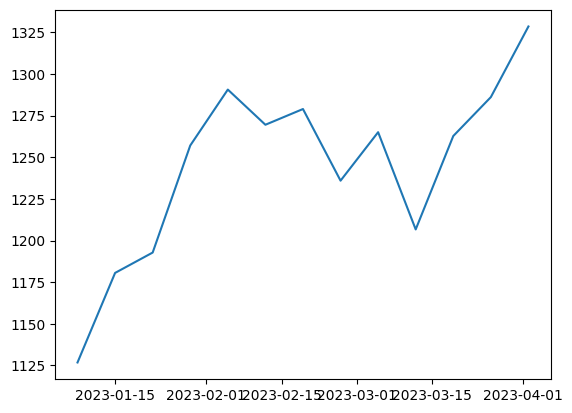

In [94]:
cc=Rp( weekly_data(tech_data), [0.05769231, 0.05769231,0.0833333333, 0.51923077, 0.05769231, 0.05769231,0.0833333333,0.0833333333])
plt.plot(cc)
print(drawdown(cc))


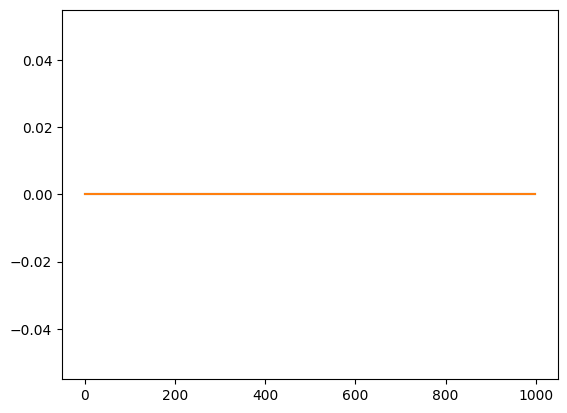

In [98]:
dd= np.ones(1000)
ddr=  drawdown( Rp(tech_data, [0.05769231, 0.05769231,0.0833333333, 0.51923077, 0.05769231, 0.05769231,0.0833333333,0.0833333333]))
for i in range(1000):
  dd[i]=  drawdown( Rp(tech_data, Pond(8)))
dd
fig,ax=plt.subplots()
ax.plot(dd)
ax.plot(np.ones(1000)*ddr)
plt.show()

In [99]:
dod= np.ones(9)
dodr=  drawdown( Rp(tech_data, [0.05769231, 0.05769231,0.0833333333, 0.51923077, 0.05769231, 0.05769231,0.0833333333,0.0833333333]))

for i in range(8):
  dod[i]=  drawdown( Rp(tech_data, np.eye(8)[i]))
dod[8]=dodr

pd.DataFrame(dod,index=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA","^IXIC", "^TNX","Portfolio"],columns=["MaxDrawDown"])

,MaxDrawDown
GOOGL,0.172731
MSFT,0.000000
GC=F,0.020764
TSLA,0.192868
AAPL,0.000000
BABA,0.328191
^IXIC,0.000000
^TNX,0.170145
Portfolio,0.000000


In [100]:
def sortino(rendement, rf):
    #rf rendement espéré
    #Calcul de la volatilité negative
    
    sigma=rendement-rf
    for i in range (len(rendement)):
        if(sigma[i]>=0):
            sigma[i]=0
    sigm=sum(sigma**2)
    return  (np.mean(rendement-rf))/np.sqrt(sigm)

In [101]:
dod= np.ones(9)
dodr=  sortino( Rp(tech, [0.05769231, 0.05769231,0.0833333333, 0.51923077, 0.05769231, 0.05769231,0.0833333333,0.0833333333]),0.0)

print(dodr)
for i in range(8):
  dod[i]=  sortino( Rp(tech, np.eye(8)[i]),0.0)
dod[8]=dodr

pd.DataFrame(dod,index=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA","^IXIC", "^TNX","Portfolio"],columns=["Sortino"])

0.07223606136999551


,Sortino
GOOGL,0.022765
MSFT,0.036258
GC=F,0.025005
TSLA,0.072228
AAPL,0.077976
BABA,0.016497
^IXIC,0.042789
^TNX,-0.007382
Portfolio,0.072236


In [78]:
print(drawdown(tech_data.iloc[:,0]))
sortino(tech.iloc[:,0], 0.01)


107.73999786376953
89.12999725341797
0.17273065694583306


-0.043000565227130805

In [92]:
np.array([0.07692308, 0.07692308, 0.69230769, 0.07692308, 0.07692308])*0.75
(1-0.75)/3

0.08333333333333333

In [ ]:
import time
